In [ ]:
import yfinance as yf
dat = yf.Ticker("MSFT")

In [ ]:
dat = yf.Ticker("MSFT")
dat.info
dat.calendar
dat.analyst_price_targets
dat.quarterly_income_stmt
dat.history(period='1mo') # 1 month of historical data
dat.option_chain(dat.options[0]).calls

In [ ]:
from data_fetch import get_price
start = '2024-01-01'
end = '2025-01-01'
prices = get_price(['AAPL', 'MSFT'], start, end)
prices

In [ ]:
#setting pandas to display floats with 2 decimal places
import pandas as pd

# Set pandas to display floats with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
prices['Close']

In [ ]:
from data_fetch import get_price
from portfolio import Portfolio
from plotter import plot_prices

shares = ['AAPL', 'MSFT']

portfolio = Portfolio()
for symbol in shares:
    portfolio.add_asset(symbol, 1)



start = '2024-01-01'
end = '2025-01-01'

prices_df = get_price(shares, start, end)
prices_close_df = prices_df['Close']

print("Portfolio Value:", portfolio.get_portfolio_value(prices_close_df))
#plot_prices(prices_close_df)

In [ ]:
#1. getting data from yfinance
# Example usage
from data_fetch import get_price
from portfolio import Portfolio
from plotter import plot_prices

shares = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
num_shares = [1, 1, 1, 1, 1, 1, 1] # Number of shares for each asset
portfolio = Portfolio()
for i, symbol in enumerate(shares):
    portfolio.add_asset(symbol, num_shares[i])



prices_df = get_price(shares)
#prices_df.to_csv('prices.csv', index=True)
prices_df

In [ ]:
import pandas as pd
#retrieve data from csv
prices_df = pd.read_csv('prices.csv', parse_dates=True)
prices_df

In [ ]:
fil = ['Price', 'Close']
for i,element in enumerate(shares[1:]):
    fil.append('Close'+'.'+str(i+1))
    print(fil)
#filtering the columns to get only the closing prices
prices_close_df = prices_df[fil]
prices_close_df

In [ ]:
column_new = ['Date']
for i,element in enumerate(shares):
    column_new.append(element)
print(column_new)
prices_close_df.columns = column_new
prices_close_df


In [ ]:
#erase rows 0 and 1
prices_close_df = prices_close_df.drop([0, 1])
prices_close_df

In [ ]:
prices_close_df.set_index('Date', inplace=True)
prices_close_df

In [ ]:
#Changing output of dataframe to float
print(portfolio.holdings['AAPL'])
print(type(float(prices_close_df['AAPL']['2024-01-02'])))
print("Portfolio Value:", portfolio.get_portfolio_value(prices_close_df))


In [ ]:
value = portfolio.get_portfolio_value(prices_close_df)
value

## Visualisations for the platform

In [ ]:
#1. basic visualization of stock prices.
#prices_close_df
prices_close_df = prices_close_df.astype(float) #turn values to float
plot_prices(prices_close_df)

## Making Dates Dynamic 

In [ ]:
import pandas as pd
#retrieve data from csv
prices_pdates = pd.read_csv('prices.csv', parse_dates=True)
prices_pdates = prices_pdates.drop([0, 1])
prices_pdates = prices_pdates.rename(columns={'Price': 'Date'})
prices_pdates

In [ ]:
from datetime import datetime
# prices_pdates.columns
prices_pdates_out = prices_pdates['Date']
prices_pdates_list= prices_pdates_out.tolist()
print(type(prices_pdates_list[0]))
prices_pdates_list_e1 =datetime.strptime(prices_pdates_list[0], '%Y-%m-%d') #Transform the first date to datetime object
prices_pdates_list_e1


In [ ]:
#turn values in Date column to datetime objects (PANDAS METHOD)
prices_pdates['Date_a'] = pd.to_datetime(prices_pdates['Date'])

In [ ]:
# Convert the 'Date' column to datetime objects (PYTHON METHOD)
prices_pdates['Date_ b'] = prices_pdates['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))  # Format to string

In [ ]:
# check the type of the first element in the 'Date' columns
print(type(prices_pdates['Date_a'].to_list()[0]))  # PANDAS METHOD
print(type(prices_pdates['Date_ b'].to_list()[0]))  # PYTHON METHOD

#both work. Need to change the code to use dynamic dates. 

# Backtester 1.0

In [ ]:
# Bring it all together for a 1.0 version. 
def get_closest_date_index(date, df_original):
    """
    Get the index of the closest date in a list of dates.
    Args:
        date (timestamp): The date to find the closest match for.
        date_series (pandas.Series): A pandas series of pandas.Timestamp objects.
    Returns:
        int: The index of the closest date in the list.
    """
    # getting the closest date index
    df_with_dates = df_original.copy()
    df_with_dates['timedeltas'] = abs(df_with_dates.index - date)
    min_diff = min(df_with_dates['timedeltas'])
    # Calculate the difference between the last date in the DataFrame and today
    index = df_with_dates['timedeltas'].isin([min_diff]).idxmax()
    return index
## 1. DATA FETCHING
# Example usage
from data_fetch import get_price
from portfolio import Portfolio
from portfolio import get_closest_date_index
from plotter import plot_df_prices
import pandas as pd
import datetime

shares = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
num_shares = [1, 1, 1, 1, 1, 1, 1] # Number of shares for each asset
portfolio = Portfolio()
for i, symbol in enumerate(shares):
    portfolio.add_asset(symbol, num_shares[i])

prices_df = get_price(shares)
#prices_df.to_csv('prices.csv', index=True)

#retrieve data from csv
prices_df = pd.read_csv('prices.csv')
prices_df

columns_to_filter = ['Price', 'Close']
for i,element in enumerate(shares[1:]):
    columns_to_filter.append('Close'+'.'+str(i+1))
    print(columns_to_filter)

#filtering the columns to get only the closing prices
prices_close_df = prices_df[columns_to_filter]

column_new = ['Date']
for i,element in enumerate(shares):
    column_new.append(element)
print(column_new)
prices_close_df.columns = column_new

#erase rows 0 and 1
prices_close_df = prices_close_df.drop([0, 1])

# Convert 'Date' column to datetime objects
prices_close_df['Date'] = pd.to_datetime(prices_close_df['Date'])
prices_close_df.set_index('Date', inplace=True)
print(prices_close_df)
print(type(prices_close_df.index[-1]))

#Time delat 
date = datetime.datetime.strptime("2025-06-06", '%Y-%m-%d')
date = pd.Timestamp(date)  # Convert to pandas Timestamp
print("Portfolio Value:", portfolio.get_portfolio_value(prices_close_df, date))


#1. basic visualization of stock prices.
#prices_close_df
prices_close_df = prices_close_df.astype(float) #turn values to float
plot_df_prices(prices_close_df)

#both work. Need to change the code to use dynamic dates. 

In [ ]:
date = datetime.datetime.strptime("2024-12-28", '%Y-%m-%d')
date = pd.Timestamp(date)  # Convert to pandas Timestamp
i = get_closest_date_index(date, prices_close_df)
i

## Creating different Portfolios to track and backtest

In [ ]:
#portfolio2
shares = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
num_shares_santi = [2, 3, 1, 2, 3, 5, 8] # Number of shares for each asset
num_shares_gus = [5, 5, 5, 1, 1, 5, 1]
portfolio_santi = Portfolio()
portfolio_gus = Portfolio()
for i, symbol in enumerate(shares):
    portfolio_santi.add_asset(symbol, num_shares_santi[i])
    portfolio_gus.add_asset(symbol, num_shares_gus[i])

print("Portfolio Value:", portfolio_santi.get_portfolio_value(prices_close_df, date))
print("Portfolio Value:", portfolio_gus.get_portfolio_value(prices_close_df, date))



## Plotting the portfolio values

In [ ]:
cutoff_date = datetime.datetime.strptime("2009-01-31", '%Y-%m-%d')
cutoff_date = pd.Timestamp(cutoff_date) 
# Create a new DataFrame with the same index as prices_close_df
# Get all rows after and including the cutoff_date
sliced_df = prices_close_df.loc[cutoff_date:]

portfolio_values_df = pd.DataFrame()
portfolio_values_df['Date'] = sliced_df.index
portfolio_values_df['Santi'] = portfolio_values_df['Date'].apply(lambda x: portfolio_santi.get_portfolio_value(prices_close_df, x))  # Format to string
portfolio_values_df['Gus'] = portfolio_values_df['Date'].apply(lambda x: portfolio_gus.get_portfolio_value(prices_close_df, x)) 
portfolio_values_df['Base'] = portfolio_values_df['Date'].apply(lambda x: portfolio.get_portfolio_value(prices_close_df, x)) 
# Display the new DataFrame
portfolio_values_df

In [ ]:
portfolio_values_df.set_index('Date', inplace=True)
# Plot the portfolio values
portfolio_values_df.plot()

In [ ]:
a = list(range(1, 10))
a.append(a[-1])
a

In [ ]:
a[-2] = 100
a

In [ ]:
import pandas as pd
dict = {'2025': {'aa':1, 'bb':2}, '2026': {'aa':3, 'bb':4}}
df = pd.DataFrame(dict)
df.T

## Backtester 1.1

In [ ]:
# Bring it all together for a 1.1 version. 
from data_fetch import get_price
from data_fetch import import_yf_df
from portfolio import Portfolio
from portfolio import get_closest_date_index
from plotter import plot_df_prices_components
import pandas as pd



shares = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
num_shares = [1, 1, 1, 1, 1, 1, 1] # Number of shares for each asset

#get price data with the API (yahoo finance)
#prices_df = get_price(shares)
#prices_df.to_csv('prices.csv', index=True)

#import csv data and clean it
prices_close_df = import_yf_df('prices.csv', shares)


valid_date = get_closest_date_index(pd.Timestamp('2023-12-31'), prices_close_df)  # Get the index of the closest date  # Get the first date from the DataFrame index
stock_price_purchased = dict(prices_close_df.loc[pd.to_datetime(valid_date)])  # Get the stock prices for the valid date
print(stock_price_purchased)
portfolio = Portfolio('Gus', "M", {str(valid_date):{'AAPL': 1, 'MSFT': 1, 'GOOG': 1, 'AMZN': 1, 'TSLA': 1, 'NVDA': 1, 'NFLX': 1}}, stock_price_purchased,str(valid_date))

#test functionality
#removing an asset
valid_date = get_closest_date_index(pd.Timestamp('2025-04-30'), prices_close_df)
symbol = 'AAPL'
portfolio.remove_asset(symbol,1, str(valid_date), prices_close_df)  # Remove 1 share of AAPL at the price on the valid date


#adding a new asset
valid_date = get_closest_date_index(pd.Timestamp('2025-06-01'), prices_close_df)  # Get the index of the closest date  # Get the first date from the DataFrame index
stock_price_purchased = dict(prices_close_df.loc[pd.to_datetime(valid_date)])  # Get the stock prices for the valid date
symbol = 'AAPL'
portfolio.add_asset(symbol, 1,str(valid_date), float(stock_price_purchased[symbol]))  # Add 1 share of AAPL at the price on the valid date

#print(portfolio.holdings)
print(portfolio.investment)
print(portfolio.capital_gains)


# # Calculating portfolio value for each date in the test DataFrame
val = portfolio.get_portfolio_value(prices_close_df)
cols_graph = val.columns[:-1]
val  # Remove the 'Date' column for plotting



In [ ]:
from plotter import plot_df_prices_components
plot_df_prices_components(val[cols_graph])

### Viz comparison

In [ ]:
# Bring it all together for a 1.2 version. 
from data_fetch import get_price
from data_fetch import import_yf_df
from portfolio import Portfolio
from portfolio import get_closest_date_index
from plotter import plot_df_prices_components
from plotter import plot_df_prices_lines
from plotter import plot_df_prices_lines

import pandas as pd



shares = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
num_shares = [1, 1, 1, 1, 1, 1, 1] # Number of shares for each asset

#get price data with the API (yahoo finance)
#prices_df = get_price(shares)
#prices_df.to_csv('prices.csv', index=True)

#import csv data and clean it
prices_close_df = import_yf_df('prices.csv', shares)


valid_date_g = get_closest_date_index(pd.Timestamp('2023-12-31'), prices_close_df)  # Get the index of the closest date  # Get the first date from the DataFrame index
valid_date_s = get_closest_date_index(pd.Timestamp('2021-12-31'), prices_close_df)  # needto handle different dates for different portfolios
valid_date_w = get_closest_date_index(pd.Timestamp('2018-12-31'), prices_close_df)  # idem

stock_price_purchased = dict(prices_close_df.loc[pd.to_datetime(valid_date_g)])
portfolio_g = Portfolio('Gustavo', "M", {str(valid_date_g):{'AAPL': 10, 'MSFT': 10, 'GOOG': 10, 'AMZN': 10, 'TSLA': 10, 'NVDA': 10, 'NFLX': 10}}, stock_price_purchased, str(valid_date_g))
portfolio_s = Portfolio('Santiago', "S", {str(valid_date_s):{'AAPL': 8, 'MSFT': 10, 'GOOG': 12, 'AMZN': 5, 'TSLA': 14, 'NVDA': 4, 'NFLX': 15}}, stock_price_purchased, str(valid_date_s))
portfolio_w = Portfolio('Warren', "B", {str(valid_date_w):{'AAPL': 40, 'MSFT':60}}, stock_price_purchased, str(valid_date_w))

valid_date_g2 = get_closest_date_index(pd.Timestamp('2025-06-01'), prices_close_df)
stock_price_purchased2 = dict(prices_close_df.loc[pd.to_datetime(valid_date_g2)])  # Get the stock prices for the valid date
symbol2 = 'AAPL'
portfolio_g.add_asset(symbol2, 1, str(valid_date_g2), float(stock_price_purchased2[symbol2]))  # Add 1 share of AAPL at the price on the valid date
portfolio_s.add_asset(symbol2, 1, str(valid_date_g2), float(stock_price_purchased2[symbol2]))  # Add 1 share of AAPL at the price on the valid date
portfolio_w.add_asset(symbol2, 1, str(valid_date_g2), float(stock_price_purchased2[symbol2]))  # Add 1 share of AAPL at the price on the valid date

# Calculating portfolio value for each date in the test DataFrame
portfolio_g.get_portfolio_value(prices_close_df)
portfolio_s.get_portfolio_value(prices_close_df)
portfolio_w.get_portfolio_value(prices_close_df)

# Assuming val_g, val_s, and val_w are DataFrames with a "total value" column and the same index
comparison_df = pd.DataFrame({
    'Gus': portfolio_g.portfolio_value['Total_Value'],
    'Santiago': portfolio_s.portfolio_value['Total_Value'],
    'Warren': portfolio_w.portfolio_value['Total_Value']
})
# Display the joined DataFrame
comparison_df

#plot_df_prices_lines(comparison_df)


In [ ]:
inv_df = pd.DataFrame({portfolio_g.full_name: portfolio_g.investment, 
              portfolio_s.full_name: portfolio_s.investment, 
              portfolio_w.full_name: portfolio_w.investment}).T
inv_df

In [ ]:
capgain_df = pd.DataFrame({
              portfolio_g.full_name: portfolio_g.capital_gains, 
              portfolio_s.full_name: portfolio_s.capital_gains, 
              portfolio_w.full_name: portfolio_w.capital_gains}).T
capgain_df

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(portfolio_g.portfolio_value.index, portfolio_g.portfolio_value['Total_Value'], label=portfolio_g.full_name)
plt.plot(portfolio_s.portfolio_value.index, portfolio_s.portfolio_value['Total_Value'], label=portfolio_s.full_name)
plt.plot(portfolio_w.portfolio_value.index, portfolio_w.portfolio_value['Total_Value'], label=portfolio_w.full_name)
plt.legend()
plt.title("Portfolio Values (from inception)")
plt.show()

In [ ]:

plot_df_prices_lines([portfolio_g, portfolio_s, portfolio_w])

### API data

In [ ]:
##FMP API
# PUBLIC API KEY = ?apikey=eGw4yVV5QZwCAsvqO3zZcs8dNRulA1Nk
import requests
# Define the API endpoint and parameters
url = "https://financialmodelingprep.com/stable/senate-latest"
params = {
    'apikey': 'eGw4yVV5QZwCAsvqO3zZcs8dNRulA1Nk'  
}
response = requests.get(url, params=params)
# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Parse the JSON response
    print(data)  # Print the data or process it as needed


In [ ]:
import pandas as pd
# Convert the JSON data to a DataFrame
df = pd.DataFrame(data)
# Display the DataFrame
#df.to_csv('data/senate_data.csv', index=False)  # Save to CSV file
df.info()  # Display the first few rows of the DataFrame

In [ ]:
df['symbol'].unique()  # Get unique symbols from the DataFrame
symbol_list = list(df['symbol'].unique())
print(symbol_list)  # Print the unique symbols
print(len(symbol_list))  
# prices_df = get_price(symbol_list)
# prices_df.to_csv('data/senate_prices.csv', index=True)  # Save to CSV file

In [ ]:
df[df['lastName'] == 'Moran']

In [ ]:
#print(df.amount)
for amount in df.amount: 
    amount = amount.split()
    amount.remove('-')
    #print(amount)
    #print(amount[0][1:])
    #print(amount[0][1:].replace(',', '.'))
    #print(float(amount[0][1:].replace(',', '.')))
    no_1 = float(amount[0][1:].replace(',', ''))
    no_2 = float(amount[1][1:].replace(',', '')) 
    print(no_1, no_2)

In [ ]:
#df[df["assetType"]=='ETF'] # Check unique asset types 
df.info

In [ ]:
#get all symbols for senator purchases
symbols_senator = df['symbol'].unique()
print(type(symbols_senator)) # Display the unique symbols


In [ ]:
#getting a list of senators for the analysis since 2020
import pandas as pd
import requests
import json
#load json data from link
url = "https://unitedstates.github.io/congress-legislators/legislators-current.json"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Parse the JSON response
    senator_data_df = pd.DataFrame(data)  # Convert the JSON data to a DataFrame

#need to filter data to include senators for whom we have data (2020 onwards)
#start senators_json
senators_dict={}
for senator in data:
    if senator['terms'] is not None:
        for term in senator['terms']:
            if term['type'] == 'sen' and term['end'] >= '2020-06-01':
                #senators_dict[senator['id']['bioguide']] = senator #modify to include transactions by data
                senators_dict[senator['name']['official_full']] = senator #modify to include transactions by data

print('No. of senators: ', len(senators_dict))

#create a set of senator names
senators_set = {}
for senator in senators_dict.values():
    senators_set [f'{senator['name']['official_full'][0]} {senator['name']['official_full'].split(' ')[-1]}'] = senator['name']['official_full']  # Add first and last name as a list

print(senators_set.keys())
print('J Banks' in senators_set.keys())  # Check if 'J Morran' is in the set
print(senators_set)  # Check if 'J Banks' is in the set



In [ ]:
#create new dict with empty transactions
senators_transactions = {} 
for senator in senators_set.keys():
    senators_transactions[senators_set[senator]] = {}  # Initialize an empty dictionary for each senator

print(senators_transactions)
 # Create a copy of the senators_dict to store transactions
for transaction in df.iterrows():  
    #print(transaction[1].office)
    fullname = transaction[1].office
    simplified_name = f'{fullname[0]} {fullname.split(' ')[-1]}'
    #print(simplified_name)
    if simplified_name in senators_set.keys():
        #print(senators_transactions[senators_set[simplified_name]])
        if transaction[1].transactionDate not in senators_transactions[senators_set[simplified_name]]:
            senators_transactions[senators_set[simplified_name]][transaction[1].transactionDate]= []
        
        senators_transactions[senators_set[simplified_name]][transaction[1].transactionDate].append({'range':transaction[1].amount,
                                                                                                     'symbol':transaction[1].symbol,
                                                                                                     'type':transaction[1].type,
                                                                                                     'owner':transaction[1].owner,
                                                                                                     'assettype':transaction[1].assetType})
                                                                                                    
        # print(simplified_name, 'not found in the set')

print(senators_transactions)   

In [ ]:
senators_transactions[senators_set['J Moran']]#this data is not labelled

In [ ]:
for senator, transactions in senators_transactions.items():
    if bool (transactions) == True:
        for keys_values in transactions.items():
            for transaction in keys_values[1]:
                x = transaction['range'].split()
                x.remove('-')
                range_lower= (float(x[0][1:].replace(',', '')))
                range_higher = (float(x[1][1:].replace(',', '')))
                range_avg = (range_lower + range_higher) / 2
                transaction['range_lower'] = range_lower
                transaction['range_higher'] = range_higher
                transaction['range_avg'] = range_avg
                print(transaction)
  
# bring it all together for portfolio creation


In [ ]:
# # portfolio = Portfolio(names, str(valid_date):'symbol', stock_price_purchased,str(valid_date))
# from portfolio import Portfolio
# import pandas as pd 
# valid_date = get_closest_date_index(pd.Timestamp(31-12-2024), close_df)
# stock_price_purchased = dict(close_df.loc[pd.to_datetime(valid_date)])
# portfolio_santi = Portfolio('santiago','se',{str(valid_date):{'GOOG':1}}, stock_price_purchased,str(valid_date))
# print(portfolio_santi)
# bool(portfolio_santi)

In [ ]:
from portfolio import get_closest_date_index
from data_fetch import import_yf_df
from portfolio import Portfolio
close_df = import_yf_df('data/senate_prices.csv', symbol_list)
close_df.index[0]
# print(close_df.index[0])
senator_portfolio = {}

for names in senators_transactions.keys():
    senator_portfolio[names] = {}

for values in senators_transactions.values():
    if bool (values) == True:
        # portfolio = Portfolio(names, str(valid_date):'symbol', stock_price_purchased,str(valid_date))
        # portfolio = Portfolio('Gus', "M", {str(valid_date):{'AAPL': 1, 'MSFT': 1, 'GOOG': 1, 'AMZN': 1, 'TSLA': 1, 'NVDA': 1, 'NFLX': 1}}, stock_price_purchased,str(valid_date))
        for k ,t in values.items():
            i_transaction = t[0]
            # print(i_transaction['symbol'])
            

for name_l, reported_transactions in senators_transactions.items():
    name_list = name_l.split()
    first_name = name_list[0]
    last_name = name_list[-1]
    
    if bool (reported_transactions) == True:
        for transaction_dates, s in reported_transactions.items():
            for s_transaction in s:
                valid_date = get_closest_date_index(pd.Timestamp(transaction_dates), close_df)  # Get the index of the closest date  # Get the first date from the DataFrame index     
                
                if valid_date is None or pd.isna(valid_date):
                    #print(f"Skipping transaction on {transaction_dates} for {name_l} (no valid date found)")
                    pass
                #creatiing variables to input in portfolio
                symb = s_transaction['symbol']
                units = int(s_transaction['range_avg']/close_df.loc[pd.Timestamp(valid_date)][s_transaction['symbol']])
                stk_price = close_df.loc[pd.Timestamp(valid_date)]

                #print(f"Transaction {transaction_dates} for {name_l} with valid date: {valid_date}, type: {s_transaction['type']}, symbol: {symb}, price: {stk_price[symb]}, units: {units}")
                if bool (senator_portfolio[name_l]) == False:
                    senator_portfolio[name_l] = Portfolio(first_name,
                                                            last_name,
                                                            {str(valid_date):{symb:units}},
                                                            stk_price,
                                                            str(valid_date))# Initialize a new Portfolio object for the senator
        
                else:
                    #print(f"Processing transactions for {name_l}, {senator_portfolio[name_l].holdings}, {s_transaction['type']}, {s_transaction['range']}, symbol: {symb}")
                    if s_transaction['type'][0].lower() == 'p':
                        senator_portfolio[name_l].add_asset(symb, units, str(valid_date), float(stk_price[symb]))
                        #  def add_asset(self, symbol, units, buy_date, buy_price):
                    elif s_transaction['type'][0].lower() == 's':     
                        senator_portfolio[name_l].remove_asset(symb, units, str(valid_date), float(stk_price[symb]))  # Assuming remove_asset is defined in Portfolio
                        # remove_asset(self, symbol, units, sell_date, historical_prices_df):
                        #print(f"Removing {units} shares of {symb} for {name_l} on {valid_date}")
                    else:
                        #print(f"Unknown transaction type: {s_transaction['type']} in {name_l} on {valid_date}")
                        pass
                    #print(f"PROCESSED {name_l}, {senator_portfolio[name_l].holdings}")

print(senator_portfolio['Jerry Moran'].holdings)

In [ ]:
senator_portfolio['John Boozman'].holdings

#### Plotting

In [ ]:
# Clean holdings: keep only the first element for each symbol
cleaned_holdings = {
    date: {symbol: max(0, value[0]) if isinstance(value, list) and len(value) > 0 else value
           for symbol, value in symbols.items()}
    for date, symbols in senator_portfolio['John Boozman'].holdings.items()
}

holdings_df = pd.DataFrame(cleaned_holdings).T
holdings_df

In [ ]:
holdings_df = pd.DataFrame(senator_portfolio['John Boozman'].holdings).T
holdings_df

In [ ]:
senator_portfolio['John Boozman'].get_portfolio_value(close_df)
senator_portfolio['John Boozman'].portfolio_value


In [ ]:
from plotter import plot_df_prices_lines
plot_df_prices_lines([senator_portfolio['John Boozman']])


In [ ]:
from plotter import plot_df_prices_components
plot_df_prices_components(senator_portfolio['John Boozman'])

## Backtester 1.2

In [ ]:
#premium API
##FMP API
# PUBLIC API KEY = ?apikey=eGw4yVV5QZwCAsvqO3zZcs8dNRulA1Nk
# import requests
# import pandas as pd
# # Define the API endpoint and parameters
# url1 = "https://financialmodelingprep.com/stable/senate-latest?page="
# url2= "&limit=100"
# params = {
#     'apikey': 'wK1Tzs5HqLBNe3ucXx3BICLSR3QRdLfy'  
# }
# data = []
# for i in range (0,101):
#     response = requests.get(url1+str(i)+url2, params=params)
# # Check if the request was successful
#     if response.status_code == 200:
#         data_temp = response.json()  # Parse the JSON response
#         data.extend(data_temp)
# print(len(data)) 
# print(type(data)) # Print the data or process it as needed
# historic_df = pd.DataFrame(data)  # Convert the JSON data to a DataFrame
# historic_df.to_csv('data/senate_transaction_historic_data.csv', index=False)  # Save to CSV file
# historic_df

In [ ]:
# #YFinance API pull
# from data_fetch import get_price

# #get unique symbols from the DataFrame
# symbol_list = list(historic_df['symbol'].unique())


# # #get prices for the symbols
# #prices_df = get_price(symbol_list)
# #prices_close_df = prices_df['Close']
# #prices_close_df.to_csv('data/senate_stock_prices.csv', index=True)  # Save to CSV file
# prices_close_df


In [ ]:
# import pandas as pd
# prices_close_df= pd.read_csv('data/senate_stock_prices.csv', parse_dates=True)
# # Drop all columns whose name starts with 'Unnamed'
# prices_close_df = prices_close_df.loc[:, ~prices_close_df.columns.str.startswith('Unnamed')]
# prices_close_df

In [ ]:
# historic_df = pd.read_csv('data/senate_transaction_historic_data.csv', parse_dates=True)
# historic_df

In [ ]:
# close_df= pd.read_csv('data/senate_stock_prices.csv', parse_dates=True)
# close_df = prices_close_df.loc[:, ~prices_close_df.columns.str.startswith('Unnamed')]
# close_df.set_index('Date', inplace=True)
# close_df.index = pd.to_datetime(close_df.index)  # Ensure the index is in datetime format
# close_df.fillna(0, inplace=True)  # Fill NaN values with 0
# close_df


RNWK <class 'str'> 2022-12-28 00:00:00
nan True
NVDA <class 'str'> 2025-04-14 00:00:00
110.7 False
SBUX <class 'str'> 2025-04-14 00:00:00
84.89 False
AAPL <class 'str'> 2025-04-14 00:00:00
202.25 False
SBUX <class 'str'> 2025-04-14 00:00:00
84.89 False
NVDA <class 'str'> 2025-04-14 00:00:00
110.7 False
AAPL <class 'str'> 2025-04-14 00:00:00
202.25 False
SBUX <class 'str'> 2025-04-11 00:00:00
84.83 False
SBUX <class 'str'> 2025-04-11 00:00:00
84.83 False
SBUX <class 'str'> 2025-04-11 00:00:00
84.83 False
SBUX <class 'str'> 2025-04-11 00:00:00
84.83 False
HON <class 'str'> 2025-04-03 00:00:00
205.63 False
HON <class 'str'> 2025-04-03 00:00:00
205.63 False
EL <class 'str'> 2025-04-29 00:00:00
59.29 False
EL <class 'str'> 2025-04-29 00:00:00
59.29 False
NVDA <class 'str'> 2025-01-06 00:00:00
149.41 False
AAPL <class 'str'> 2024-12-19 00:00:00
249.19 False
LRCX <class 'str'> 2024-12-19 00:00:00
70.82 False
KVUE <class 'str'> 2024-11-18 00:00:00
23.28 False
MET <class 'str'> 2024-11-19 00:00

/Users/gustavo/repos/repos_learning/python_course/python-coruse/Projects/backtester/portfolio.py:210: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)  # Forward fill to copy portfolio values to all dates until manually changed
/Users/gustavo/repos/repos_learning/python_course/python-coruse/Projects/backtester/portfolio.py:218: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df['Total_Value'] = merged_df[[col + '_value' for col in original_columns]].sum(axis=1)
/Users/gustavo/repos/repos_learning/python_course/python-coruse/Projects/backtester/portfolio.py:224: SettingWithCopyWarning: 
A value is trying to be set on a 

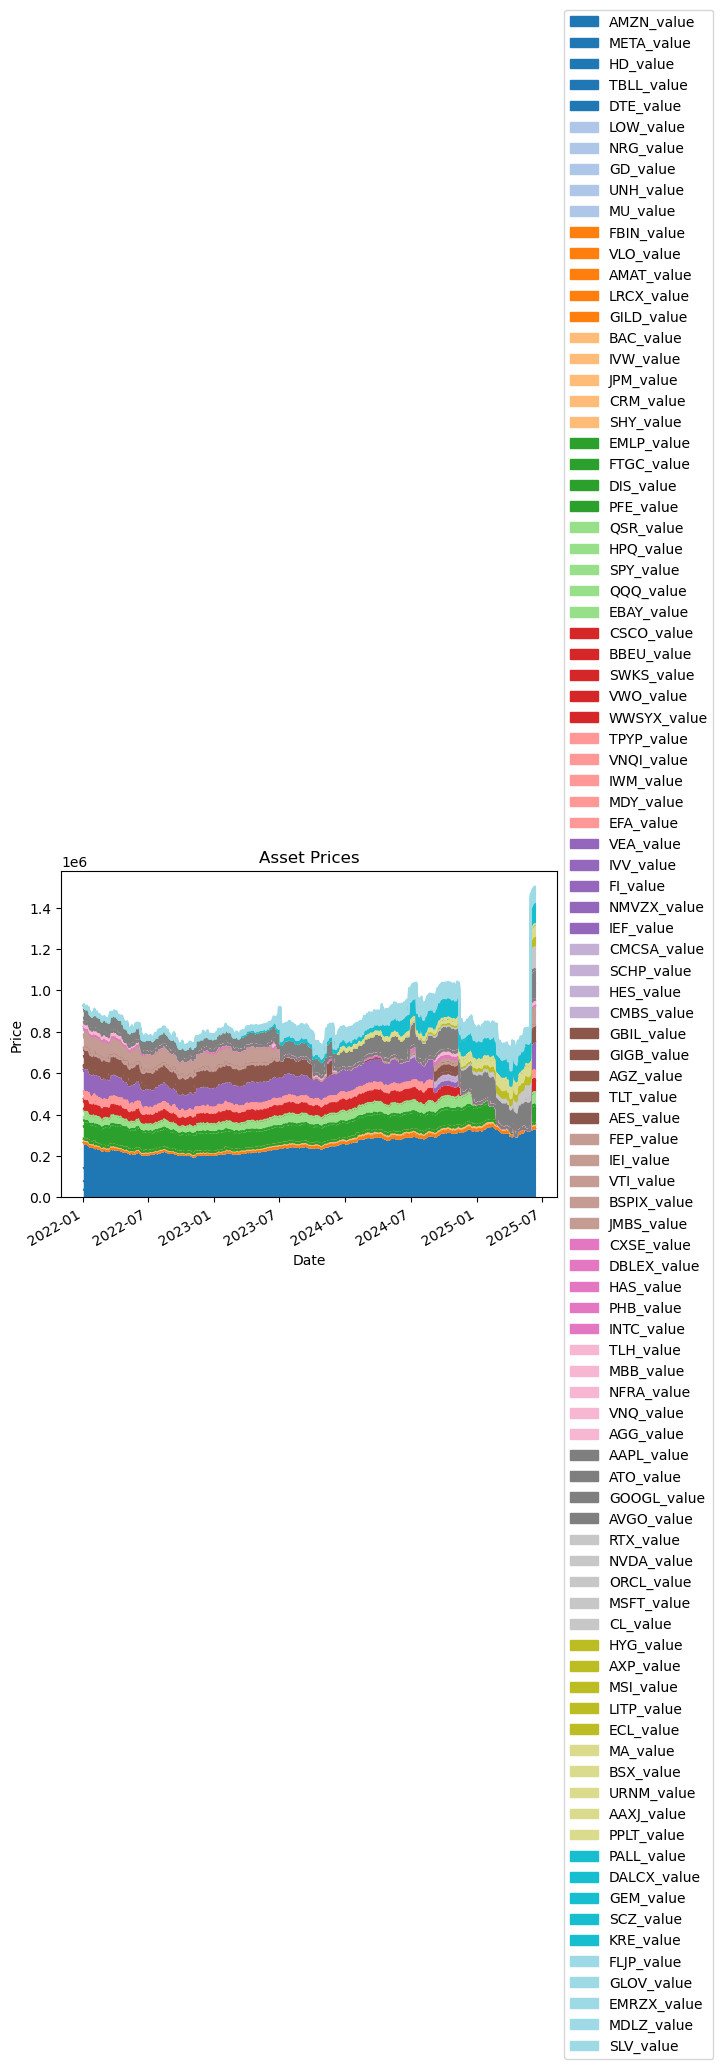

In [ ]:
import requests
import pandas as pd
import json
from portfolio import get_closest_date_index
from data_fetch import import_yf_df
from portfolio import Portfolio
from plotter import plot_df_prices_components
from plotter import plot_df_prices_lines
from plotter import plot_df_networth_lines
import numpy as np


##FMP API
#######################################################################################
### raspberry automation code. Comment out when running manually
# # PUBLIC API KEY = ?apikey=eGw4yVV5QZwCAsvqO3zZcs8dNRulA1Nk
# # Define the API endpoint and parameters
# url = "https://financialmodelingprep.com/stable/senate-latest" #Api Url  
# params = {
#     'apikey': 'eGw4yVV5QZwCAsvqO3zZcs8dNRulA1Nk'  
# }

# response = requests.get(url, params=params)
# # Check if the request was successful
# if response.status_code == 200:
#     data = response.json()  # Parse the JSON response


# response = requests.get(url, params=params)
# # Check if the request was successful
#    #getting a list of senators for the analysis since 2020

# df = pd.DataFrame(data) #newer data from the API
# historic_df = pd.read_csv('data/senate_historic_data.csv') #older data from the CSV file
# df['symbol'].unique()  # Get unique symbols from the DataFrame
# symbol_list = list(df['symbol'].unique())
# print(f'Number of unique symbols: {len(symbol_list)}')  # Print the unique symbols
###########################################################################################


################################################################
#right now we have the premium API data 
historic_df = pd.read_csv('data/senate_transaction_historic_data.csv', parse_dates=True)  # Load the historic data from CSV
df = historic_df
#################################################################

#load json data from link
url = "https://unitedstates.github.io/congress-legislators/legislators-current.json"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Parse the JSON response
    senator_data_df = pd.DataFrame(data)  # Convert the JSON data to a DataFrame


#need to filter data to include senators for whom we have data (2020 onwards)
#start senators_json
senators_dict={}
for senator in data:
    if senator['terms'] is not None:
        for term in senator['terms']:
            if term['type'] == 'sen' and term['end'] >= '2017-01-01':
                senators_dict[senator['id']['bioguide']] = senator #modify to include transactions by data
                senators_dict[senator['name']['official_full']] = senator #modify to include transactions by data

#create a set of senator names
senators_set = {}
for senator in senators_dict.values():
    senators_set [f'{senator['name']['official_full'][0]} {senator['name']['official_full'].split(' ')[-1]}'] = senator['name']['official_full']  # Add first and last name as a list

#create new dict with empty transactions
senators_transactions = {} 
for senator in senators_set.keys():
    senators_transactions[senators_set[senator]] = {}  # Initialize an empty dictionary for each senator

 # Create a copy of the senators_dict to store transactions
for transaction in df.iterrows():  
    fullname = transaction[1].office
    simplified_name = f'{fullname[0]} {fullname.split(' ')[-1]}'
    if simplified_name in senators_set.keys():
        if transaction[1].transactionDate not in senators_transactions[senators_set[simplified_name]]:
            senators_transactions[senators_set[simplified_name]][transaction[1].transactionDate]= []

        #creating dict for sentators name and transactions 
        senators_transactions[senators_set[simplified_name]][transaction[1].transactionDate].append({'range':transaction[1].amount,
                                                                                                     'symbol':transaction[1].symbol,
                                                                                                     'type':transaction[1].type,
                                                                                                     'owner':transaction[1].owner,
                                                                                                     'assettype':transaction[1].assetType})

for senator, transactions in senators_transactions.items():
    #calcaution Average of senators invement 
    if bool (transactions) == True:
        for keys_values in transactions.items():
            for transaction in keys_values[1]:
                x = transaction['range'].split()
                x.remove('-')
                range_lower= (float(x[0][1:].replace(',', '')))
                range_higher = (float(x[1][1:].replace(',', '')))
                range_avg = (range_lower + range_higher) / 2
                transaction['range_lower'] = range_lower #lowest amount of invemnet from the range
                transaction['range_higher'] = range_higher #highest amount of invemnet from the range
                transaction['range_avg'] = range_avg #avergae amount of invemnet from the range 

#close_df = import_yf_df('data/senate_stock_prices.csv', symbol_list) #importing stock prices and list of the symbols
#close_df.index[0]
close_df= pd.read_csv('data/senate_stock_prices.csv', parse_dates=True)
close_df = close_df.loc[:, ~close_df.columns.str.startswith('Unnamed')]# Drop all columns whose name starts with 'Unnamed'
close_df.set_index('Date', inplace=True)
close_df.index = pd.to_datetime(close_df.index) 
#close_df.fillna(0, inplace=True)  # Fill NaN values with 0

senator_portfolio = {} #empty dic of senator portfolio 

error_list = [] #empty list of nan values

for names in senators_transactions.keys():
    senator_portfolio[names] = {} # =empty dict of sentator names 

for name_l, reported_transactions in senators_transactions.items():
    #creating list of first name and last name 
    name_list = name_l.split()
    first_name = name_list[0]
    last_name = name_list[-1]

    if bool (reported_transactions) == True:
        for transaction_dates, s in reported_transactions.items():# the keys and value of transections 
            for s_transaction in s:
                valid_date = get_closest_date_index(pd.Timestamp(transaction_dates), close_df)  # Get the index of the closest date  # Get the first date from the DataFrame index     
                if valid_date is None or pd.isna(valid_date):
                    pass

                #creating variables to input in portfolio
                symb = s_transaction['symbol']
                if type(symb) != str:
                    error_list.append({name_l:s_transaction})
                    continue
                print(symb, type(symb), pd.Timestamp(valid_date))
                print(close_df.loc[pd.Timestamp(valid_date)][s_transaction['symbol']], np.isnan(close_df.loc[pd.Timestamp(valid_date)][s_transaction['symbol']]))
                if np.isnan(close_df.loc[pd.Timestamp(valid_date)][s_transaction['symbol']]):
                   error_list.append({name_l:s_transaction})
                   continue #skip to next iteration if the price is NaN
                units = int(s_transaction['range_avg']/close_df.loc[pd.Timestamp(valid_date)][s_transaction['symbol']])
                stk_price = close_df.loc[pd.Timestamp(valid_date)]

               #checking if porfolio is emtpy 
                if bool (senator_portfolio[name_l]) == False:
                    #creating new portfolio of senator in sentor porfolio
                    senator_portfolio[name_l] = Portfolio(first_name,
                                                            last_name,
                                                            {str(valid_date):{symb:units}},
                                                            stk_price,
                                                            str(valid_date))# Initialize a new Portfolio object for the senator
                else:
                    if s_transaction['type'][0].lower() == 'p':
                        senator_portfolio[name_l].add_asset(symb, units, str(valid_date), float(stk_price[symb]))
                        #  def add_asset(self, symbol, units, buy_date, buy_price):
                        #print(f'adding {symb} asset: {senator_portfolio[name_l].investment} for {name_l}, price: {stk_price[symb]*units}')
                    elif s_transaction['type'][0].lower() == 's':     
                        senator_portfolio[name_l].remove_asset(symb, units, str(valid_date), float(stk_price[symb]))  # Assuming remove_asset is defined in Portfolio
                        #print(f'selling {symb} asset: {senator_portfolio[name_l].investment} for {name_l}, price: {stk_price[symb]*units}')
                    else:
                        pass

# Clean holdings: keep only the first element for each symbol
cleaned_holdings = {
    date: {symbol: max(0, value[0]) if isinstance(value, list) and len(value) > 0 else value
           for symbol, value in symbols.items()}
    for date, symbols in senator_portfolio['John Boozman'].holdings.items()
}

holdings_df = pd.DataFrame(cleaned_holdings).T
holdings_df

senator_portfolio['John Boozman'].get_portfolio_value(close_df)
plot_df_prices_components(senator_portfolio['John Boozman']) #plotiong graph of senator 


In [24]:
import pickle
import datetime

print(error_list)
print(len(error_list))  # Print the number of errors
today = datetime.date.today()
print(today)

with open(f'output/error_list_{today}.pkl', 'wb') as f:
    pickle.dump(error_list, f)

with open(f'output/senator_portfolio_{today}.pkl', 'wb') as f:
    pickle.dump(senator_portfolio, f)


[{'Maria Cantwell': {'range': '$15,001 - $50,000', 'symbol': 'RNWK', 'type': 'Sale (Full)', 'owner': 'Self', 'assettype': 'Stock', 'range_lower': 15001.0, 'range_higher': 50000.0, 'range_avg': 32500.5}}, {'Sheldon Whitehouse': {'range': '$1,001 - $15,000', 'symbol': 'SQ', 'type': 'Sale (Full)', 'owner': 'Self', 'assettype': 'Stock', 'range_lower': 1001.0, 'range_higher': 15000.0, 'range_avg': 8000.5}}, {'Sheldon Whitehouse': {'range': '$1,001 - $15,000', 'symbol': 'FTVVNT', 'type': 'Exchange', 'owner': 'Self', 'assettype': 'Stock', 'range_lower': 1001.0, 'range_higher': 15000.0, 'range_avg': 8000.5}}, {'Sheldon Whitehouse': {'range': '$15,001 - $50,000', 'symbol': 'RTN', 'type': 'Exchange', 'owner': 'Joint', 'assettype': 'Stock', 'range_lower': 15001.0, 'range_higher': 50000.0, 'range_avg': 32500.5}}, {'Sheldon Whitehouse': {'range': '$1,001 - $15,000', 'symbol': 'UTX', 'type': 'Exchange', 'owner': 'Self', 'assettype': 'Stock', 'range_lower': 1001.0, 'range_higher': 15000.0, 'range_avg

In [ ]:
# import pickle
#import datetime
#today = datetime.date.today()

# # open a pickle file
# with open(f'output/error_list_{today}.pkl', 'rb') as f:
#     error_list = pickle.load(f)

# print(error_list)

[{'Maria Cantwell': {'range': '$15,001 - $50,000', 'symbol': 'RNWK', 'type': 'Sale (Full)', 'owner': 'Self', 'assettype': 'Stock', 'range_lower': 15001.0, 'range_higher': 50000.0, 'range_avg': 32500.5}}, {'Sheldon Whitehouse': {'range': '$1,001 - $15,000', 'symbol': 'SQ', 'type': 'Sale (Full)', 'owner': 'Self', 'assettype': 'Stock', 'range_lower': 1001.0, 'range_higher': 15000.0, 'range_avg': 8000.5}}, {'Sheldon Whitehouse': {'range': '$1,001 - $15,000', 'symbol': 'FTVVNT', 'type': 'Exchange', 'owner': 'Self', 'assettype': 'Stock', 'range_lower': 1001.0, 'range_higher': 15000.0, 'range_avg': 8000.5}}, {'Sheldon Whitehouse': {'range': '$15,001 - $50,000', 'symbol': 'RTN', 'type': 'Exchange', 'owner': 'Joint', 'assettype': 'Stock', 'range_lower': 15001.0, 'range_higher': 50000.0, 'range_avg': 32500.5}}, {'Sheldon Whitehouse': {'range': '$1,001 - $15,000', 'symbol': 'UTX', 'type': 'Exchange', 'owner': 'Self', 'assettype': 'Stock', 'range_lower': 1001.0, 'range_higher': 15000.0, 'range_avg

In [25]:
senator_portfolio

{'Maria Cantwell': {},
 'Amy Klobuchar': {},
 'Bernard Sanders': {},
 'Sheldon Whitehouse': <portfolio.Portfolio at 0x15f10ead0>,
 'John Barrasso': {},
 'Roger F. Wicker': <portfolio.Portfolio at 0x15c6eba70>,
 'Susan M. Collins': <portfolio.Portfolio at 0x15c6abd90>,
 'John Cornyn': {},
 'Richard J. Durbin': {},
 'Lindsey Graham': <portfolio.Portfolio at 0x15c6abc50>,
 'Mitch McConnell': <portfolio.Portfolio at 0x15c6abbb0>,
 'Jeff Merkley': {},
 'Jack Reed': <portfolio.Portfolio at 0x15c6abe30>,
 'James E. Risch': {},
 'Jeanne Shaheen': {},
 'Mark R. Warner': <portfolio.Portfolio at 0x15c6aba70>,
 'Kirsten E. Gillibrand': {},
 'Christopher A. Coons': <portfolio.Portfolio at 0x15c6abcf0>,
 'Tammy Baldwin': {},
 'Michael F. Bennet': {},
 'Marsha Blackburn': {},
 'Richard Blumenthal': <portfolio.Portfolio at 0x15c6ab930>,
 'John Boozman': <portfolio.Portfolio at 0x15c6ab9d0>,
 'Shelley Moore Capito': <portfolio.Portfolio at 0x15c6abb10>,
 'Bill Cassidy': <portfolio.Portfolio at 0x15c6ab

/Users/gustavo/repos/repos_learning/python_course/python-coruse/Projects/backtester/portfolio.py:210: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)  # Forward fill to copy portfolio values to all dates until manually changed
/Users/gustavo/repos/repos_learning/python_course/python-coruse/Projects/backtester/portfolio.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['yield'] = final['Total_Value'].pct_change()
/Users/gustavo/repos/repos_learning/python_course/python-coruse/Projects/backtester/portfolio.py:210: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future vers

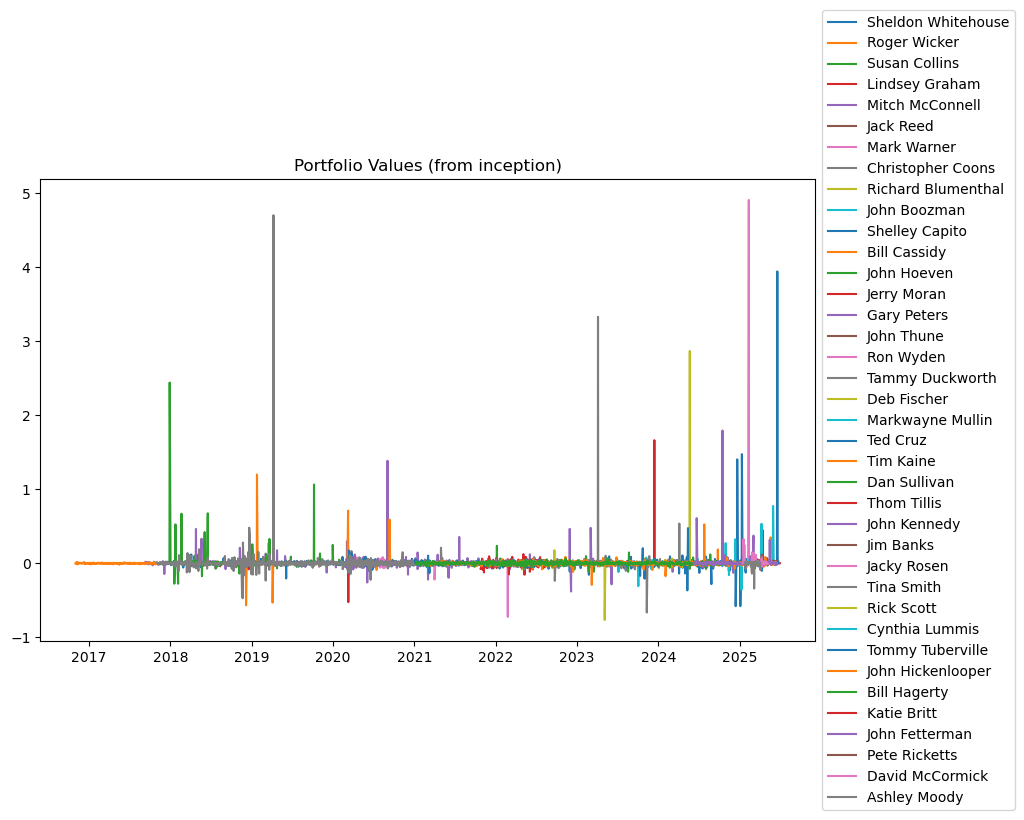

In [26]:
from plotter import plot_df_prices_lines
senator_port_list = []
for portfolios in senator_portfolio.values(): 
    if bool(portfolios):
        portfolios.get_portfolio_value(close_df) 
        portfolios.get_net_worth()
        senator_port_list.append(portfolios)

plot_df_prices_lines(senator_port_list)  # Plotting all senator portfolios

In [27]:
senator_portfolio['John Boozman'].portfolio_value

,AMZN_value,META_value,HD_value,TBLL_value,DTE_value,LOW_value,NRG_value,GD_value,UNH_value,MU_value,...,GEM_value,SCZ_value,KRE_value,FLJP_value,GLOV_value,EMRZX_value,MDLZ_value,SLV_value,Total_Value,yield
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,37189.44,42170.94,63450.24,122430.28,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7995.00,933812.14,NaN
2022-01-05,36487.92,40622.40,62590.08,122443.49,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7875.00,923122.46,-0.011447
2022-01-06,36241.50,41661.90,62361.60,122430.28,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7691.25,922728.30,-0.000427
2022-01-07,36086.10,41577.48,60495.12,122417.07,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7732.50,919737.11,-0.003242
2022-01-10,35850.78,41111.28,59549.28,122417.07,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7785.00,917117.23,-0.002849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-05,46156.02,86195.34,62039.04,139022.04,0.0,0.0,0.0,0.0,0.0,0.0,...,18421.20,38167.04,12028.94,10059.28,10996.20,39407.2,9688.77,12168.75,1487624.80,0.000836
2025-06-06,47412.54,87843.42,61711.44,139061.67,0.0,0.0,0.0,0.0,0.0,0.0,...,18524.40,38216.00,12330.68,10104.36,11059.75,39580.8,9656.43,12258.75,1493031.97,0.003635
2025-06-09,48169.56,87384.78,61353.60,139074.88,0.0,0.0,0.0,0.0,0.0,0.0,...,18648.24,38264.96,12392.74,10110.80,11026.95,39754.4,9737.28,12521.25,1497515.59,0.003003


In [28]:
#not going to use this because we lack data. But may be useful in the future
import pandas as pd
import numpy as np
investment_df = pd.DataFrame(senator_portfolio['John Boozman'].investment, index= ["investment_value"]).T
investment_df.index.name = 'Date'
investment_df.index = pd.to_datetime(investment_df.index)
cap_gains_df = pd.DataFrame(senator_portfolio['John Boozman'].capital_gains, index= ["capital_gains"]).T
cap_gains_df.index.name = 'Date'
cap_gains_df.index = pd.to_datetime(cap_gains_df.index)
c = senator_portfolio['John Boozman'].portfolio_value[['yield']]
d = senator_portfolio['John Boozman'].portfolio_value[['Total_Value']]

#merge
#merging the holding_df with the original_columns 
merged_df = d.join(investment_df, on='Date', how='left', rsuffix='_A').join(cap_gains_df, on='Date', how='left', rsuffix='_Investment').join(c, on='Date', how='left', rsuffix='_Yield')#joins two profilos together 
merged_df.fillna(0, inplace=True)  # Forward fill to copy portfolio values to all dates until manually changed
#adding cumsums
merged_df['investment_value_cumsum'] = merged_df['investment_value'].cumsum()
merged_df['capital_gains_cumsum'] = merged_df['capital_gains'].cumsum()
merged_df['Net_worth'] = merged_df['Total_Value'] - merged_df['investment_value_cumsum']  # Calculate net worth as total value plus capital gains
merged_df['nw_yield'] = merged_df['Net_worth'].pct_change()
final_df = merged_df[['Net_worth']] 
#merged_df
final_df

,Net_worth
Date,
2022-01-04,947052.36
2022-01-05,936362.68
2022-01-06,935968.52
2022-01-07,932977.33
2022-01-10,930357.45
...,...
2025-06-05,877139.05
2025-06-06,882546.22
2025-06-09,887029.84


In [29]:
senator_portfolio['John Boozman'].get_net_worth()
senator_portfolio['John Boozman'].networth

,Net_worth
Date,
2022-01-04,947052.36
2022-01-05,936362.68
2022-01-06,935968.52
2022-01-07,932977.33
2022-01-10,930357.45
...,...
2025-06-05,877139.05
2025-06-06,882546.22
2025-06-09,887029.84


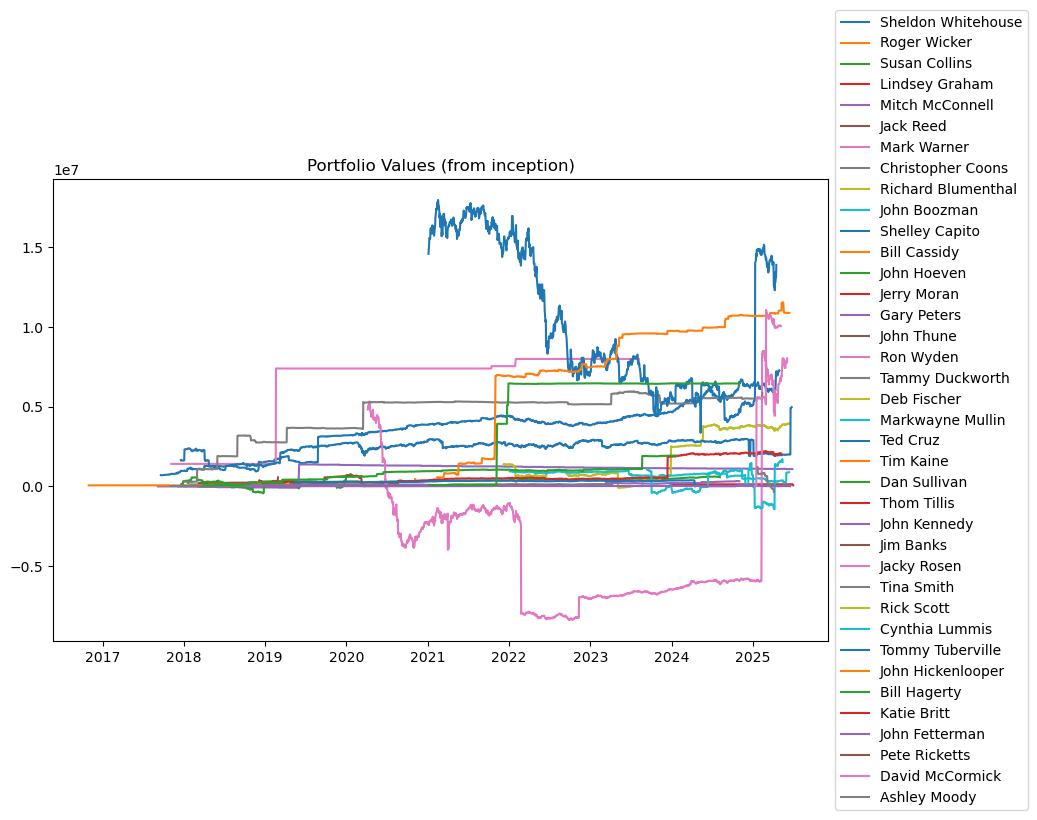

In [30]:
plot_df_networth_lines(senator_port_list)

In [31]:
senator_portfolio['Ron Wyden'].holdings

{'2025-06-03': {'PFE': [0.0, 23.35],
  'LLY': [13, 751.14],
  'IRBT': [241, 42.35],
  'SOLV': [0, 73.78],
  'UPS': [5774, 81.42],
  'JTKWY': [0, 3.8],
  'STX': [5897, 39.5],
  'PYPL': [4244, 115.24],
  'BALL': [0, 53.67],
  'DIS': [5773, 104.88],
  'META': [0, 111.4],
  'MTCH': [3381, 81.18],
  'MMM': [1378, 108.81],
  'FDX': [1348, 190.04],
  'WDAY': [222, 183.99],
  'NFLX': [482, 443.4],
  'AAPL': [11160, 89.07],
  'AMAT': [6917, 50.67],
  'KLAC': [2672, 151.36],
  'AVGO': [6220, 22.17],
  'INTC': [-304, 53.92],
  'STZ': [1559, 152.55],
  'BYND': [1986, 100.16],
  'AMWD': [0, 86.16],
  'CLX': [76, 205.66],
  'KR': [2994, 32.71],
  'W': [0, 299.21],
  'T': [5068, 16.25],
  'XOM': [3081, 31.63],
  'VAC': [2277, 88.36],
  'MAR': [4437, 94.94],
  'CAT': [1134, 107.75],
  'TRIP': [10057, 23.35],
  'GE': [0, 28.72],
  'UBER': [0, 30.64],
  'CRWD': [982, 66.07],
  'JCI': [0, 23.96],
  'TEL': [0, 63.129999999999995],
  'C': [0, 34.32]},
 '2025-02-10': {'PFE': [0.0, 23.35],
  'LLY': [13, 751.

In [ ]:
#import senator portfolio from pickle file
import pickle
import datetime
from portfolio import Portfolio
today = datetime.date.today()
with open(f'output/senator_portfolio_{today}.pkl', 'rb') as f:
    senator_portfolio = pickle.load(f)

# #gettting the negative holdings    
# print(senator_portfolio['Ron Wyden'].holdings)
# l = senator_portfolio['Ron Wyden'].holdings
date_dict = {}
# for date, v in l.items():
#     for symbol, price in v.items():
#         if price[0] < 0:
#             #print(f"Negative holding for {symbol} on {date}: {price[0]}")
#             date_dict[symbol] = price
#             if date_dict[symbol][0] == price[0]:
#                 continue
#             else:
#                 print(f"Updating {symbol} on {date} with price {price[0]}")
#                 date_dict[symbol][0] = [date_dict[symbol][0], price[0]]
# print(date_dict)  # Print the dictionary of symbols with negative holdings

print(senator_portfolio)
date_dict = {}
initial_portfolio = {}
int_stk_price = close_df.loc[pd.Timestamp("2017-09-14")]
for name, value in senator_portfolio.items():
        list_name = name.split()
        first_name = list_name[0]
        last_name = list_name[1]
        if bool (value) == True: 
            l = value.holdings
            for date, v in l.items():
                for symbol, price in v.items():
                  if price[0] < 0:
                  #print(f"Negative holding for {symbol} on {date}: {price[0]}")
                        date_dict[symbol] = price
                  if symbol not in date_dict:
                       date_dict[symbol] = [0,price[1]]
                  if date_dict[symbol][0] == price[0]:
                        continue
                  else:
                        # print(f"Updating {symbol} on {date} with price {price[0]}")
                        date_dict[symbol][0] = min(date_dict[symbol][0], price[0])
                  initial_portfolio[name] = Portfolio(first_name,last_name,{str("2017-09-14"):{}},int_stk_price,str("2017-09-14"))
# print(date_dict)  # Print the dictionary of symbols with negative holdings
print(initial_portfolio[name])
# senator_portfolio[name_l] = Portfolio(first_name,last_name, {str(valid_date):{symb:units}}, stk_price,str(valid_date))



{'Maria Cantwell': {}, 'Amy Klobuchar': {}, 'Bernard Sanders': {}, 'Sheldon Whitehouse': <portfolio.Portfolio object at 0x000001A33FCBA850>, 'John Barrasso': {}, 'Roger F. Wicker': <portfolio.Portfolio object at 0x000001A33FCBA3F0>, 'Susan M. Collins': <portfolio.Portfolio object at 0x000001A33FCBA8F0>, 'John Cornyn': {}, 'Richard J. Durbin': {}, 'Lindsey Graham': <portfolio.Portfolio object at 0x000001A33FCBAB70>, 'Mitch McConnell': <portfolio.Portfolio object at 0x000001A33FCBA490>, 'Jeff Merkley': {}, 'Jack Reed': <portfolio.Portfolio object at 0x000001A33FCBA2B0>, 'James E. Risch': {}, 'Jeanne Shaheen': {}, 'Mark R. Warner': <portfolio.Portfolio object at 0x000001A33FCBB250>, 'Kirsten E. Gillibrand': {}, 'Christopher A. Coons': <portfolio.Portfolio object at 0x000001A33FCBB570>, 'Tammy Baldwin': {}, 'Michael F. Bennet': {}, 'Marsha Blackburn': {}, 'Richard Blumenthal': <portfolio.Portfolio object at 0x000001A33FCBAE90>, 'John Boozman': <portfolio.Portfolio object at 0x000001A33FCBB

ValueError: could not convert string to float: 'NVDA'